In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mayavi import mlab
import cv2
import matplotlib.image as mpimg

# %matplotlib inline

cwd = os.getcwd()
#load all the frames
all_frames = np.asarray(np.load(cwd + "/intersection_1.bag_format_XYZIR.npy"))

********************************************************************************
         to build the TVTK classes (6.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************



<IPython.core.display.Javascript object>


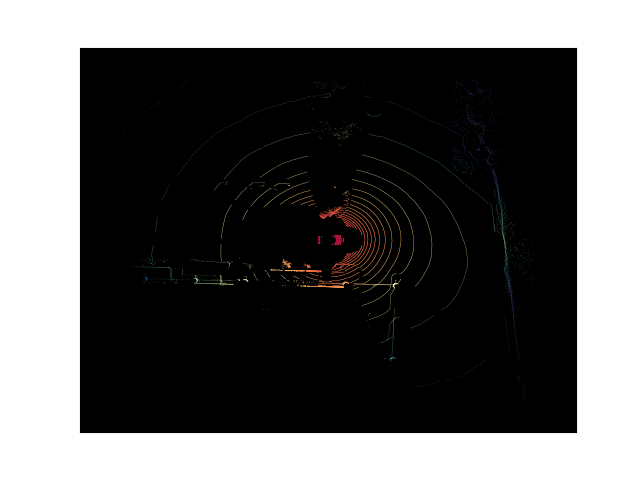

In [2]:
%matplotlib notebook
# %matplotlib inline

sample = np.asarray(all_frames[np.random.randint(0,100)])

x_s = []
y_s = []
z_s = []
i_s = []
r_s = []
for x,y,z,i,r in sample:
    if abs(x) <= 25 and abs(y) <=25:
        x_s.append(x)
        y_s.append(y)
        z_s.append(z)
        i_s.append(i)
        r_s.append(r)


fig = plt.figure(frameon = False)
cm = plt.cm.get_cmap('Spectral')
colour = np.add(np.abs(x_s),np.abs(y_s))
sc = plt.scatter(x_s, y_s, c=colour, vmin=0, vmax=31, s=0.1, edgecolors= '', cmap=cm)
# plt.axis('tight')
ax = plt.gca()
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.patch.set_facecolor('black')
# plt.colorbar(sc)
plt.show()

In [3]:
print(max(x_s), min(x_s))
print(max(y_s), min(y_s))
print(max(z_s), min(z_s))
print(max(r_s), min(r_s))

(24.984489440917969, -24.939353942871094)
(24.996984481811523, -24.999423980712891)
(5.5201249122619629, -2.5948436260223389)
(31.0, 0.0)


<IPython.core.display.Javascript object>


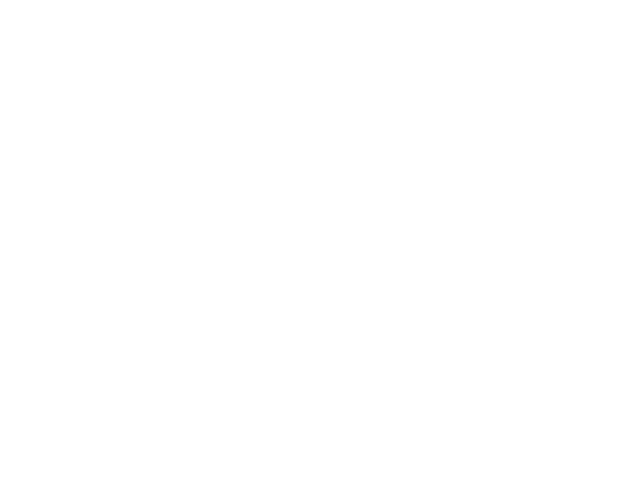

In [4]:
%matplotlib notebook


fig = plt.figure(frameon = False)
cm = plt.cm.get_cmap('Spectral')
colour = np.add(np.abs(x_s),np.abs(y_s))
sc = plt.scatter(x_s, y_s, c=r_s, vmin=0, vmax=31, s=0.25, edgecolors= '', cmap=cm)
# plt.axis('tight')
ax = plt.gca()
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.patch.set_facecolor('black')
# plt.colorbar(sc)
plt.axis=('square')
# plt.ylim(0)
plt.xlim(0)
plt.show()

In [5]:
%matplotlib notebook

<IPython.core.display.Javascript object>


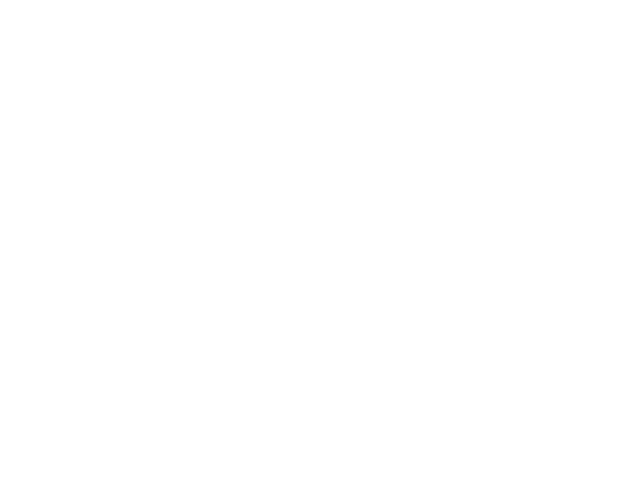

In [6]:



fig = plt.figure(frameon = False)
cm = plt.cm.get_cmap('bone')
colour = np.add(np.abs(x_s),np.abs(y_s))
sc = plt.scatter(x_s, y_s, c=z_s, vmin=-1.6, vmax=-1.5,s=1, edgecolors= '', cmap=cm)
ax = plt.gca()
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.patch.set_facecolor('black')
ax.set_xlim([0,25])
ax.set_ylim([-25,25])
plt.show()

In [104]:
plt.savefig("2_d_plot.png", bbox_inches='tight', dpi=200, pad_inches=0.0)

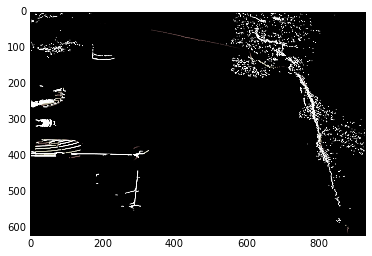

In [36]:
%matplotlib inline

img = cv2.imread("2_d_plot.png")
plt.imshow(img)
imgcv = np.copy(img)

[0 0 0]
(620, 930, 3)


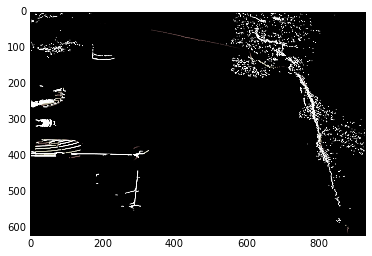

In [37]:
plt.imshow(imgcv)
print imgcv[0,0]
print imgcv.shape

In [38]:
count = 0
for i in range((imgcv.shape[0])):
    for j in range((imgcv.shape[1])):
        if not np.array_equal(imgcv[i,j],[0,0,0]):
            count += 1


In [39]:
print count,(620*930)

30858 576600


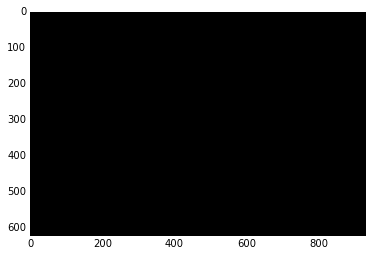

In [40]:
out_img = np.zeros(imgcv.shape)
plt.imshow(out_img)

In [41]:
for i in range((imgcv.shape[0])):
    for j in range((imgcv.shape[1])):
        if np.sum(imgcv[i,j])>125:
            out_img[i,j] = 1
        else:
            out_img[i,j] = 0

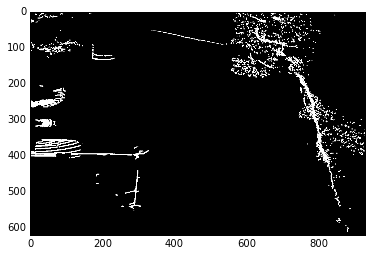

In [42]:
plt.imshow(out_img)

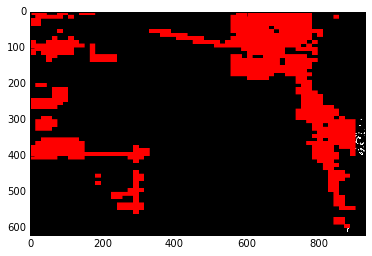

In [43]:
def slide_window(image):
    vert_windows = 60
    hori_windows = 60
    
    win_w = np.int(image.shape[1]/hori_windows)
    win_h = np.int(image.shape[0]/vert_windows)
    
    nonzero = image.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    for i in range(hori_windows):
        for j in range(vert_windows):
            win_start = (i*win_w, j*win_h)
            win_end = (i*win_w+win_w, j*win_h+win_h)
#             cv2.rectangle(image,win_start,win_end,(50,150,50), 1) 
            
#             print win_start
            
            px_found = ((nonzeroy >= win_start[1]) & (nonzeroy < win_end[1]) & 
                              (nonzerox >= win_start[0]) & (nonzerox < win_end[0])).nonzero()[0]
        
#             print len(good_left_inds)
            if len(px_found) > 0:
                sx = win_start[0]
                ex = win_end[0]
                sy = win_start[1]
                ey = win_end[1]

                occupancy = np.array( [[[sx,sy],[sx,ey],[ex,ey],[ex,sy]]], dtype=np.int32 )
                cv2.fillPoly(image, occupancy,2)            
    return image
plt.imshow(slide_window(np.copy(out_img)))

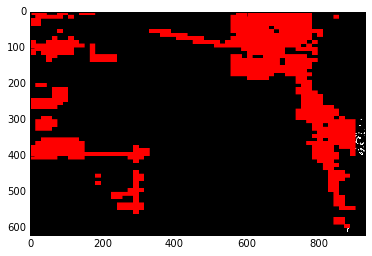

In [84]:

def obstacle_focus(image):
    
    out_img = np.zeros(image.shape)
    
    for i in range((image.shape[0])):
        for j in range((image.shape[1])):
            if np.sum(image[i,j])>125:
                out_img[i,j] = 1
            else:
                out_img[i,j] = 0
            
            
    def slide_window(image):
        vert_windows = 60
        hori_windows = 60

        win_w = np.int(image.shape[1]/hori_windows)
        win_h = np.int(image.shape[0]/vert_windows)

        nonzero = image.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])

        for i in range(hori_windows):
            for j in range(vert_windows):
                win_start = (i*win_w, j*win_h)
                win_end = (i*win_w+win_w, j*win_h+win_h)
    #             cv2.rectangle(image,win_start,win_end,(50,150,50), 1) 

    #             print win_start

                px_found = ((nonzeroy >= win_start[1]) & (nonzeroy < win_end[1]) & 
                                  (nonzerox >= win_start[0]) & (nonzerox < win_end[0])).nonzero()[0]

    #             print len(good_left_inds)
                if len(px_found) > 0:
                    sx = win_start[0]
                    ex = win_end[0]
                    sy = win_start[1]
                    ey = win_end[1]

                    occupancy = np.array( [[[sx,sy],[sx,ey],[ex,ey],[ex,sy]]], dtype=np.int32 )
                    cv2.fillPoly(image, occupancy,2)            
        return image

    image = slide_window(out_img)


    return image

img = cv2.imread("2_d_plot.png")
img = obstacle_focus(img)
plt.imshow(img)
imgcv = np.copy(img)



In [56]:
print img.shape

(620, 930, 3)


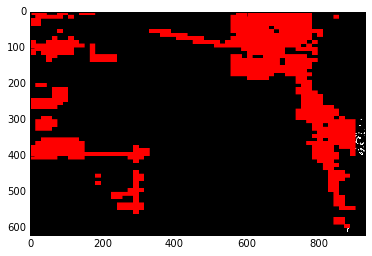

In [57]:
plt.imshow(img)

In [62]:
top_crop = np.int((240./620.)*img.shape[0])
bot_crop = np.int((380./620.)*img.shape[0])
print(top_crop,(240/620),img.shape[0])

(240, 0, 620)


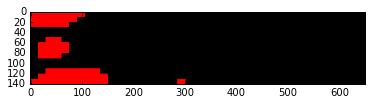

In [76]:
img_cropped = img[top_crop:bot_crop, :650]
plt.imshow(img_cropped)

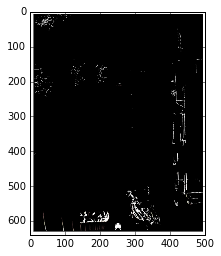

In [132]:
img2 = cv2.imread("approach_1.bag_velo_xy_images_c/approach_1.bag_velo_xy_images_c_0.png")
plt.imshow(img2)

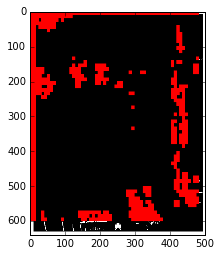

In [133]:
img2 = obstacle_focus(img2)
plt.imshow(img2)

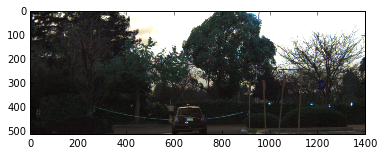

In [100]:
back_img = cv2.imread("approach_images_c/img_colour_0.png")
plt.imshow(back_img)

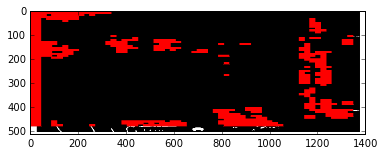

In [164]:
img2 = cv2.resize(img2,(back_img.shape[1], back_img.shape[0]))
plt.imshow(img2)

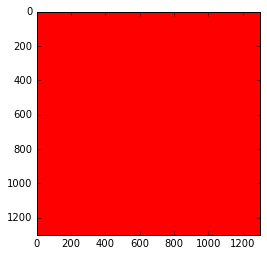

In [176]:
x1 = 0
x2 = img2.shape[1]
y1 = 0
y2 = img2.shape[2]

pts1 = np.float32([[600,y2],[800,y2],[x2,y1],[x1,y1]])
pts2 = np.float32([[x1,y2],[x2,y2],[x2,y1],[x1,y1]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img2,M,(1300,1300))
plt.imshow(dst)

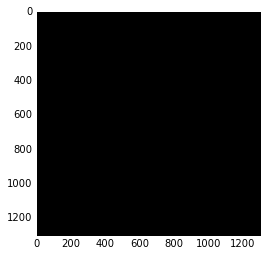

In [185]:

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def interaction(a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p):
    
    src = [ a, b, c, d, e, f, g, h]
    dest = [ i, j, k, l, m, n, o, p]
    
    pts1 = np.float32([[a,b],[c,d],[e,f],[g,h]])
    pts2 = np.float32([[i,j],[k,l],[m,n],[o,p]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    dst = cv2.warpPerspective(img2,M,(1300,1300))
    plt.imshow(dst)
    

interact(interaction, a=(0,back_img.shape[1]), b=(0,back_img.shape[0]), c=(0,back_img.shape[1]), d=(0,back_img.shape[0]), 
         e=(0,back_img.shape[1]), f=(0,back_img.shape[0]), g=(0,back_img.shape[1]), h=(0,back_img.shape[0]), i=(0,2000), 
         j=(0,2000), k=(0,2000), l=(0,2000), m=(0,2000), n=(0,2000), 
         o=(0,2000), p=(0,2000))